In [112]:
import math
import matplotlib.pyplot as plt
import numpy as np

from io import StringIO
from matplotlib.patches import Rectangle

import imageio

In [125]:
def plot_scenario1_soln(title, soln):
    arr = np.loadtxt(StringIO(soln), delimiter=" ")
    _, ax = plt.subplots()
    ax.add_patch(Rectangle((0, 5), 7.5, 10))
    ax.add_patch(Rectangle((12.5, 5), 7.5, 10))
    ax.plot(arr[:, 0], arr[:, 1], color="r")
    ax.plot(arr[:, 2], arr[:, 3], color="g")
    ax.plot(arr[:, 4], arr[:, 5], color="b")
    ax.plot(arr[:, 6], arr[:, 7], color="y")
    ax.set_xlabel("x position")
    ax.set_ylabel("y position")
    ax.set_title(title)
    ax.set_xlim(left=0, right=20)
    ax.set_ylim(bottom=0, top=20)
    plt.show()


def plot_scenario2_soln(title, soln, robot_count=8):
    arr = np.loadtxt(StringIO(soln), delimiter=" ")
    _, ax = plt.subplots()
    
    styles = ["r", "g", "b", "y"][:robot_count//2] + ["r--", "g--", "b--", "y--"][:robot_count//2]
    
    for j in range(0, robot_count*2, 2):
        ax.plot(arr[:, j], arr[:, j+1], styles[j//2])

    ax.set_xlabel("x position")
    ax.set_ylabel("y position")
    ax.set_title(title)
    ax.set_xlim(left=0, right=20)
    ax.set_ylim(bottom=0, top=20)
    plt.show()

def animate_scenario2(title, soln, robot_count=8):
    arr = np.loadtxt(StringIO(soln), delimiter=" ")

    def create_frame (i):

        fig, ax = plt.subplots()

        ax.set_xlabel("x position")
        ax.set_ylabel("y position")
        ax.set_title(title)
        ax.set_xlim(left=0, right=20)
        ax.set_ylim(bottom=0, top=20)

        ax.set_aspect(1)

        for j in range(0, robot_count*2, 2):
            plt.scatter(arr[i, j] , arr[i, j+1], s=1000)
            ax.plot(arr[i-1:i+1, j], arr[i-1:i+1, j+1])

        plt.savefig(f'images/scenario2_img_{i}.png', transparent = False, facecolor = 'white')
        plt.close()
    
    for i in range(len(arr)):
        create_frame(i)
        
    frames = []

    for i in range(len(arr)):
        image = imageio.v2.imread(f'images/scenario2_img_{i}.png')
        frames.append(image)

    imageio.mimsave('./scenario2.gif', frames, fps = 1, loop = 1) 


<IPython.core.display.Javascript object>


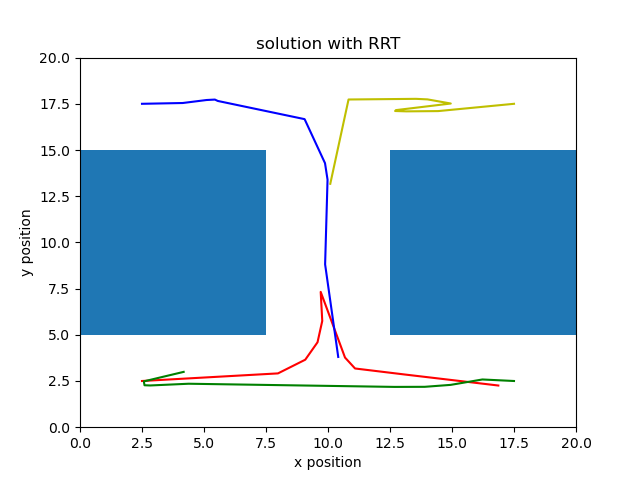

In [100]:
rrt_soln = """
2.5 2.5 17.5 2.5 2.5 17.5 17.5 17.5
7.98204 2.91142 16.2254 2.58232 4.1414 17.5425 14.4398 17.1054
9.08323 3.65245 14.9436 2.29013 5.10542 17.7051 13.1598 17.091
9.57783 4.59656 13.8993 2.18513 5.43933 17.7285 12.7058 17.11
9.76843 5.74934 12.6863 2.18038 5.55609 17.6542 12.7391 17.1579
9.7056 7.32156 4.38067 2.35196 9.0569 16.6695 14.9503 17.5151
10.6861 3.76823 2.8293 2.25828 9.87942 14.2875 14.0111 17.7391
11.0905 3.17749 2.60074 2.26999 9.98149 13.3936 13.5494 17.7682
13.0989 2.85091 2.57424 2.48011 9.8836 8.81104 10.8283 17.733
16.8682 2.25552 4.1797 2.99381 10.4125 3.80198 10.0918 13.1719
"""

plot_scenario1_soln("solution with RRT", rrt_soln)

<IPython.core.display.Javascript object>


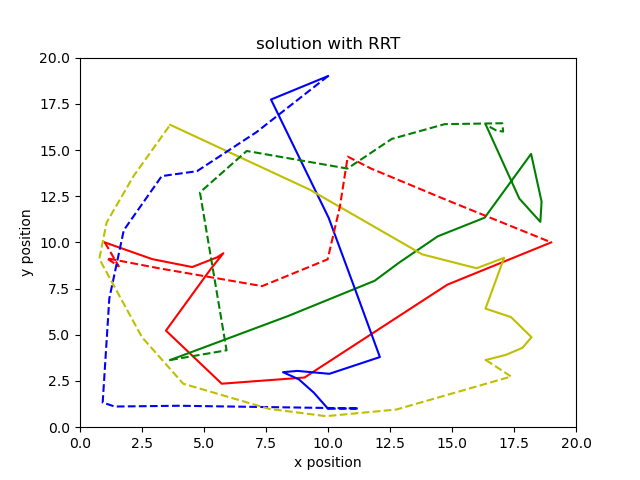

In [128]:
rrt_soln2 = """
19 10 16.364 16.364 10 19 3.63604 16.364 1 10 3.63604 3.63604 10 1 16.364 3.63604
14.8136 7.71435 17.7134 12.3738 7.70201 17.731 9.27623 12.847 1.5631 8.70381 5.90994 4.1612 11.2395 1.01478 17.3827 2.74142
9.05446 2.68916 18.5624 11.1109 10.0282 11.3237 13.8002 9.35276 1.07949 9.1402 4.83697 12.706 3.99465 1.1604 12.7551 0.956318
5.71402 2.35415 18.6122 12.2069 11.1848 7.12655 15.9918 8.60079 3.18469 8.59984 6.72189 14.9483 1.40075 1.11819 9.9146 0.59602
3.46554 5.2265 18.1894 14.7891 12.0919 3.79508 17.1006 9.16591 7.34424 7.63406 10.7827 13.995 0.914747 1.33447 7.6105 0.996341
5.27408 8.56596 16.3169 11.3383 10.0558 2.88899 16.3509 6.41807 9.9844 9.08323 12.5706 15.5991 1.18218 6.96715 4.16342 2.35243
5.7809 9.41457 14.4235 10.3273 8.76546 3.04592 17.3786 5.95857 10.4779 11.925 14.7024 16.3983 1.76571 10.6588 2.49767 4.87337
5.5298 9.19195 12.8506 8.88865 8.1852 2.97753 18.2071 4.86838 10.7959 14.6429 17.0258 16.448 3.29554 13.5882 0.777737 9.10757
4.52532 8.66608 11.88 7.92296 8.8246 2.5893 17.8383 4.29293 11.7334 13.9971 17.064 15.9974 4.71694 13.8532 1.07103 11.0729
2.9143 9.09448 8.38831 6.01505 9.42264 1.87594 17.1748 3.91509 14.8275 12.2691 16.7917 16.0539 7.11444 15.9649 2.15569 13.5824
1 10 3.63604 3.63604 10 1 16.364 3.63604 19 10 16.364 16.364 10 19 3.63604 16.364
"""

plot_scenario2_soln("solution with RRT", rrt_soln2)

<IPython.core.display.Javascript object>


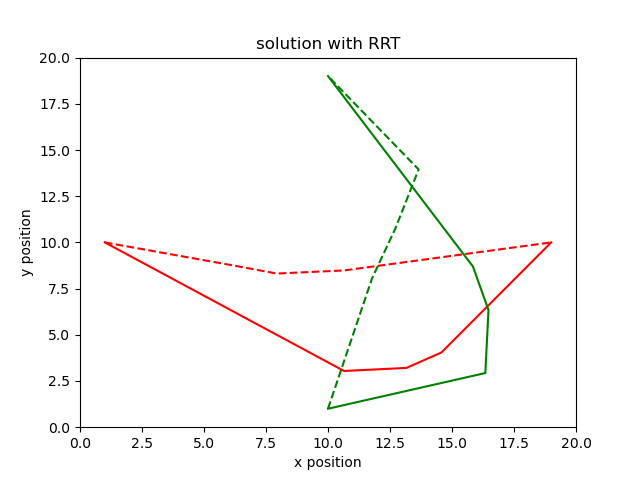

In [127]:
rrt_soln3 = """
19 10 10 19 1 10 10 1
14.5699 4.04032 15.8452 8.69353 6.28908 8.72556 11.7748 8.0494
13.1611 3.20747 16.4713 6.33743 7.93097 8.3155 12.7203 10.7633
10.6462 3.04289 16.3435 2.93002 10.6469 8.48252 13.6542 13.9472
1 10 10 1 19 10 10 19
"""

plot_scenario2_soln("solution with RRT", rrt_soln3, robot_count=4)

<IPython.core.display.Javascript object>


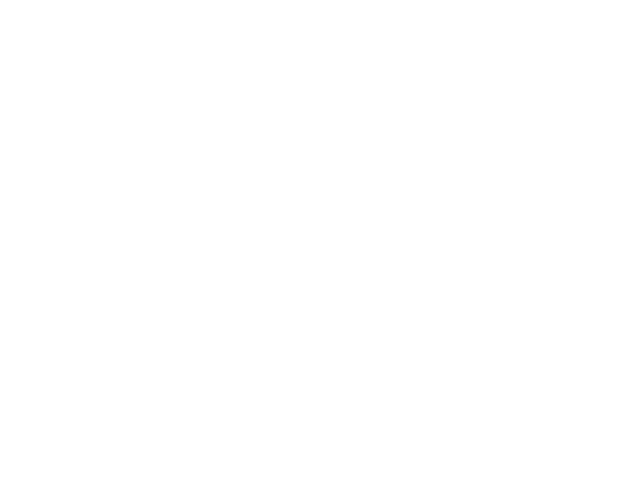

<IPython.core.display.Javascript object>


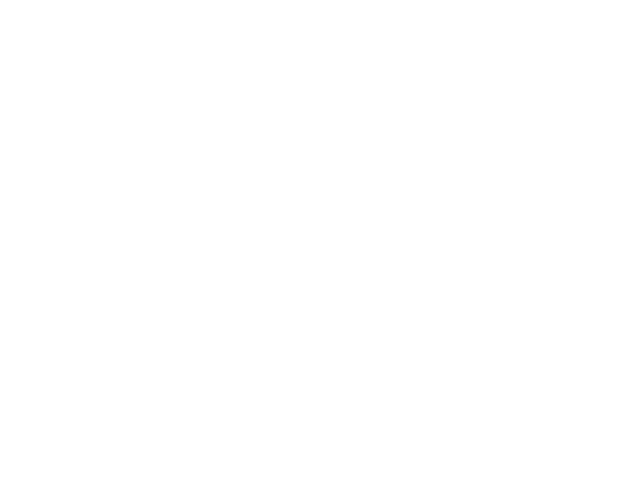

<IPython.core.display.Javascript object>


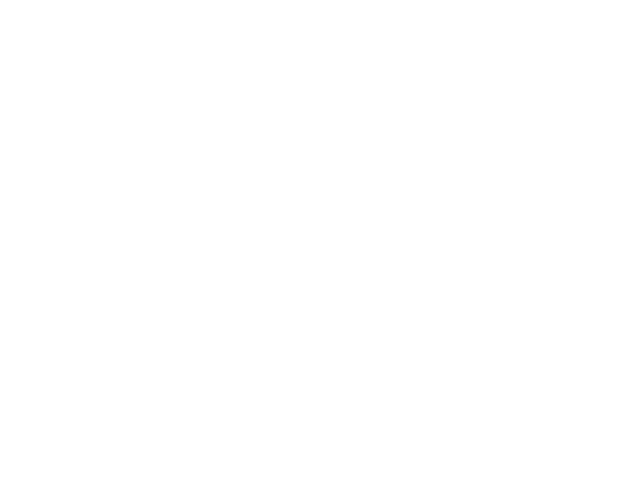

<IPython.core.display.Javascript object>


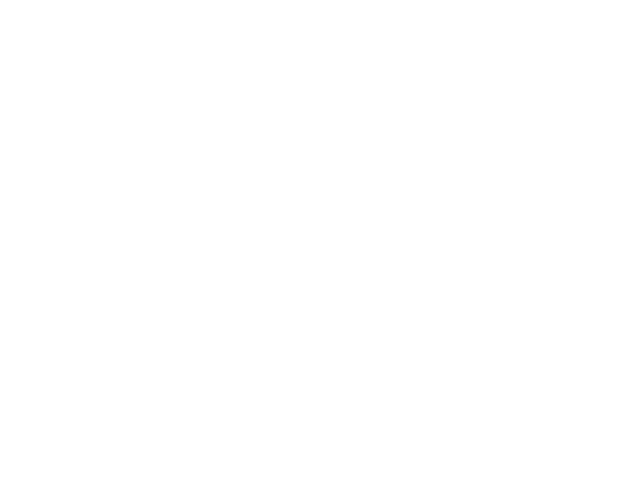

<IPython.core.display.Javascript object>


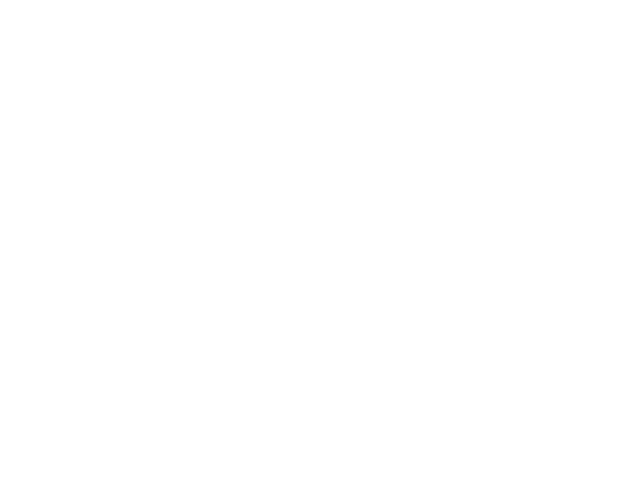

<IPython.core.display.Javascript object>


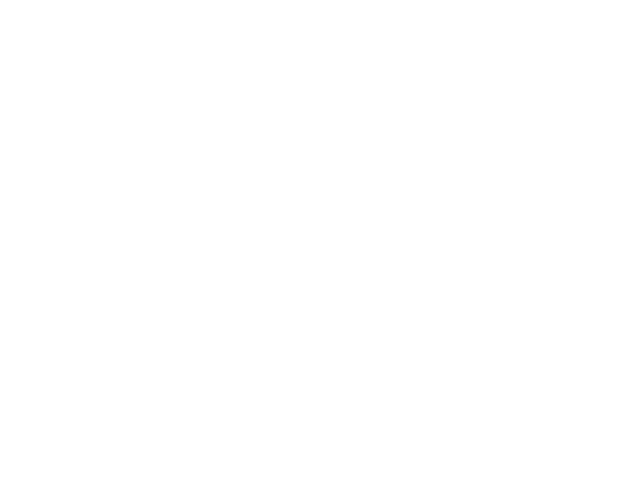

<IPython.core.display.Javascript object>


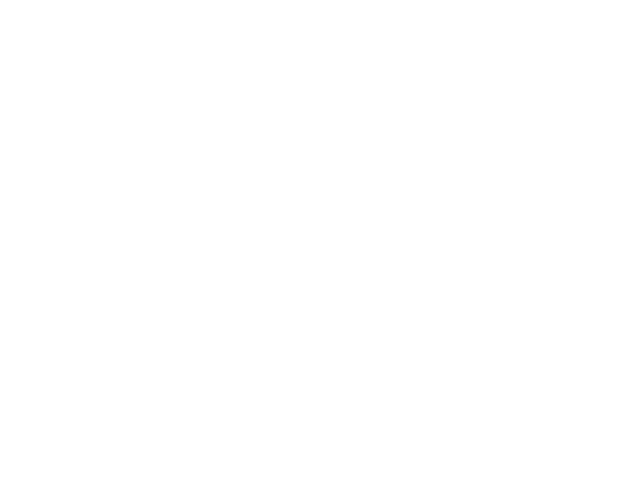

<IPython.core.display.Javascript object>


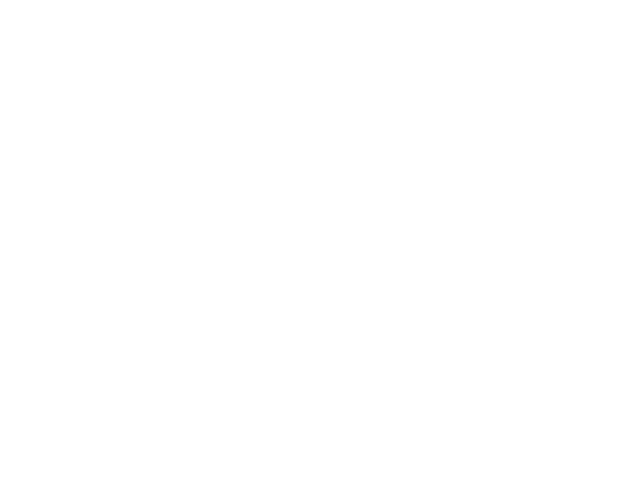

<IPython.core.display.Javascript object>


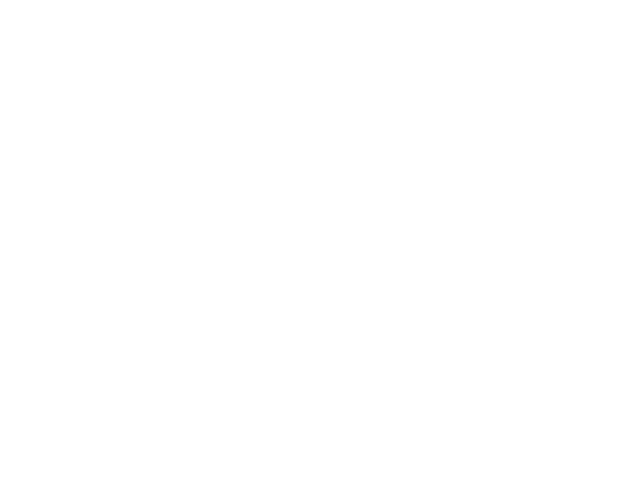

<IPython.core.display.Javascript object>


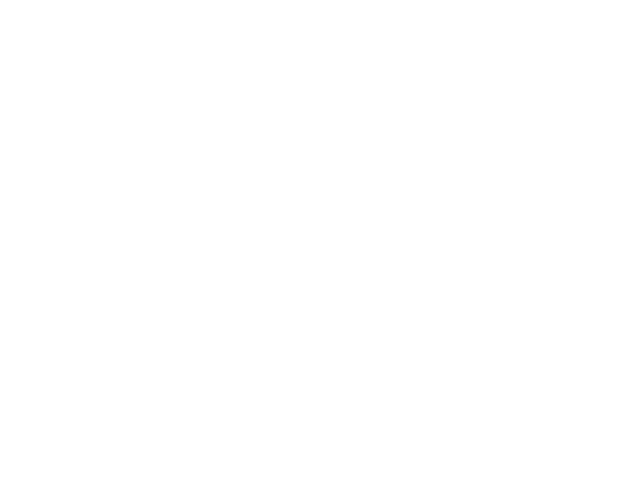

<IPython.core.display.Javascript object>


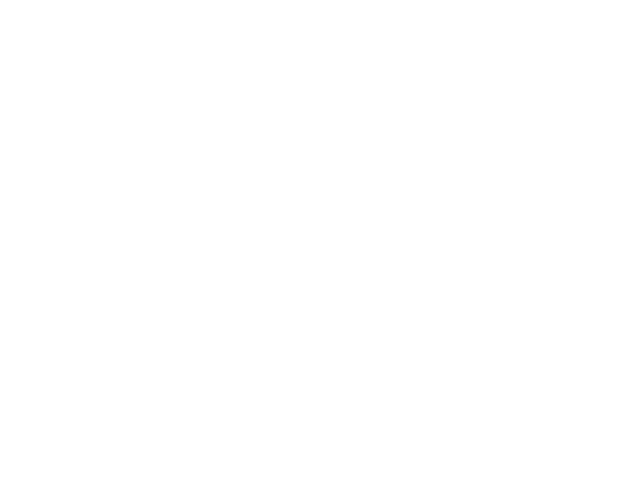

In [110]:
animate_scenario2("solution with RRT", rrt_soln2)